In [4]:
%pip install pandas seaborn folium dash matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import seaborn as sns
from dash import Dash, dcc, html, callback,Output,Input
import matplotlib.pyplot as plt
import folium
import plotly.express as px

In [6]:
bike_df = pd.read_csv('./assets/Sales.csv',parse_dates=['Date'])
bike_df.reset_index(drop=True,inplace=True)
bike_df.head()

Date  Day     Month  Year  Customer_Age       Age_Group  \
0 2013-11-26   26  November  2013            19     Youth (<25)   
1 2015-11-26   26  November  2015            19     Youth (<25)   
2 2014-03-23   23     March  2014            49  Adults (35-64)   
3 2016-03-23   23     March  2016            49  Adults (35-64)   
4 2014-05-15   15       May  2014            47  Adults (35-64)   

  Customer_Gender    Country             State Product_Category Sub_Category  \
0               M     Canada  British Columbia      Accessories   Bike Racks   
1               M     Canada  British Columbia      Accessories   Bike Racks   
2               M  Australia   New South Wales      Accessories   Bike Racks   
3               M  Australia   New South Wales      Accessories   Bike Racks   
4               F  Australia   New South Wales      Accessories   Bike Racks   

               Product  Order_Quantity  Unit_Cost  Unit_Price  Profit  Cost  \
0  Hitch Rack - 4-Bike               8         45         120     590   360   
1  Hitch Rack - 4-Bike               8         45         120     590   360   
2  Hitch Rack - 4-Bike              23         45         120    1366  1035   
3  Hitch Rack - 4-Bike              20         45         120    1188   900   
4  Hitch Rack - 4-Bike               4         45         120     238   180   

   Revenue  
0      950  
1      950  
2     2401  
3     2088  
4      418

### Checking the number of Null values per column

In [7]:
bike_df.isna().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [8]:
bike_df.describe()

Date            Day           Year  \
count                         113036  113036.000000  113036.000000   
mean   2014-11-23 12:14:55.063519232      15.665753    2014.401739   
min              2011-01-01 00:00:00       1.000000    2011.000000   
25%              2013-12-22 00:00:00       8.000000    2013.000000   
50%              2014-06-27 00:00:00      16.000000    2014.000000   
75%              2016-01-09 00:00:00      23.000000    2016.000000   
max              2016-07-31 00:00:00      31.000000    2016.000000   
std                              NaN       8.781567       1.272510   

        Customer_Age  Order_Quantity      Unit_Cost     Unit_Price  \
count  113036.000000   113036.000000  113036.000000  113036.000000   
mean       35.919212       11.901660     267.296366     452.938427   
min        17.000000        1.000000       1.000000       2.000000   
25%        28.000000        2.000000       2.000000       5.000000   
50%        35.000000       10.000000       9.000000      24.000000   
75%        43.000000       20.000000      42.000000      70.000000   
max        87.000000       32.000000    2171.000000    3578.000000   
std        11.021936        9.561857     549.835483     922.071219   

              Profit           Cost        Revenue  
count  113036.000000  113036.000000  113036.000000  
mean      285.051665     469.318695     754.370360  
min       -30.000000       1.000000       2.000000  
25%        29.000000      28.000000      63.000000  
50%       101.000000     108.000000     223.000000  
75%       358.000000     432.000000     800.000000  
max     15096.000000   42978.000000   58074.000000  
std       453.887443     884.866118    1309.094674

In [9]:
bike_df.nunique()

Date                1884
Day                   31
Month                 12
Year                   6
Customer_Age          70
Age_Group              4
Customer_Gender        2
Country                6
State                 53
Product_Category       3
Sub_Category          17
Product              130
Order_Quantity        32
Unit_Cost             34
Unit_Price            36
Profit              1256
Cost                 360
Revenue             1876
dtype: int64

In [99]:
plt.figure(figsize=(12,5))
sns.set_theme(rc={'figure.figsize': (12,5)},style='darkgrid')
sns.set_palette("pastel")


<Figure size 1200x500 with 0 Axes>

In [110]:
per_month = bike_df.groupby(by='Month')['Revenue'].agg(['sum']).reset_index()
sales_per_month = px.bar(per_month,y='Month',x='sum',orientation='h',title='Sales Per Month',hover_data='sum',hover_name='Month')
sales_per_month.update_layout(
    height=600,  # Set the figure height
    margin=dict(t=50, b=50, l=50, r=50),  # Adjust margins
    title_font=dict(size=16, color='#1BA50C'),  # Set title font properties
    yaxis_title="Month",
    xaxis_title="Revenue",
    paper_bgcolor='#000000',  # Set transparent background
)

# Update traces for custom colors and text properties
sales_per_month.update_traces(
    marker_color='#2308ED',  # Set bar color
    texttemplate='%{x}',  # Display value inside the bar
    textposition='inside',  # Position of the text
    insidetextanchor='middle'  # Anchor text in the middle of the bar
)
sales_per_month.show()


In [81]:
sales_per_year = bike_df.groupby(by='Year')['Revenue'].sum().reset_index()
year_chart = px.pie(sales_per_year,values='Revenue',names='Year',hole=0.55,title='Sales Per Year')
year_chart.show()

In [70]:
sale_cat_grouped = px.histogram(bike_df, y='Revenue',x='Year',color='Product_Category', barmode='group')
sale_cat_grouped.show()

In [71]:
sun_burst = px.sunburst(bike_df,path=['Product_Category','Customer_Gender'],title="Sales Distribution by Category and Gender")
sun_burst

In [72]:
filled_country = px.area(bike_df,x='Year',y='Revenue',title='Title',color='Age_Group',line_group='Country')
filled_country.show()

<Axes: xlabel='count', ylabel='Country'>

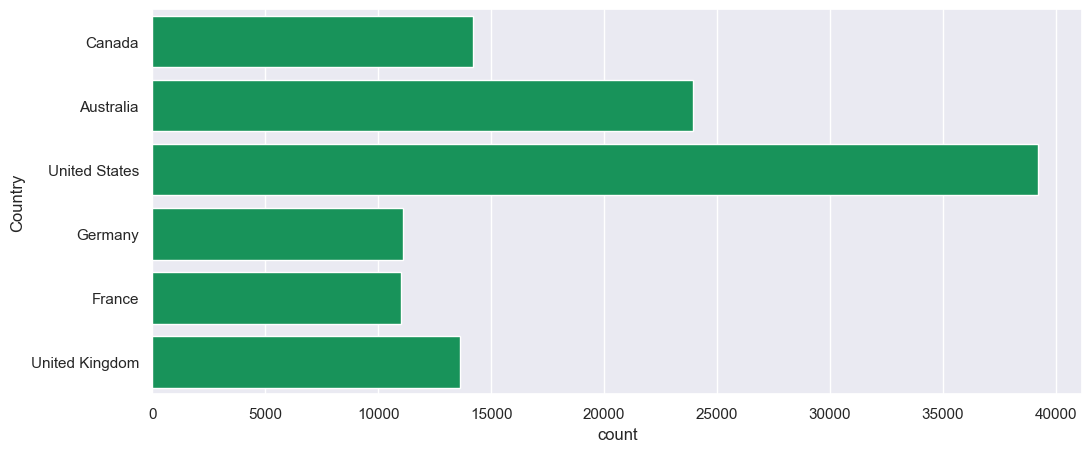

In [86]:
reglot = sns.countplot(data=bike_df,y='Country',color='#04A75B')
reglot


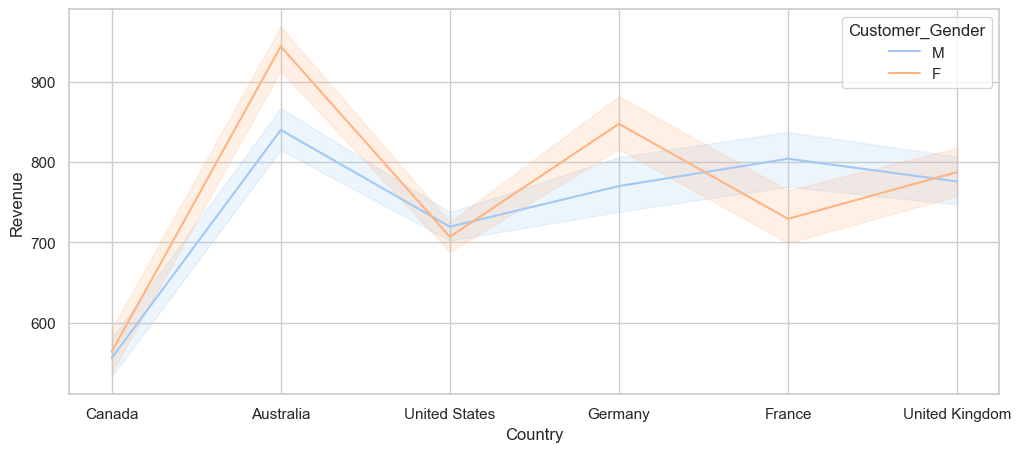

In [100]:
le_line = sns.lineplot(data=bike_df, x='Country',y='Revenue',hue='Customer_Gender')

Text(0.5, 1.0, 'Purchases by Age Group and Category')

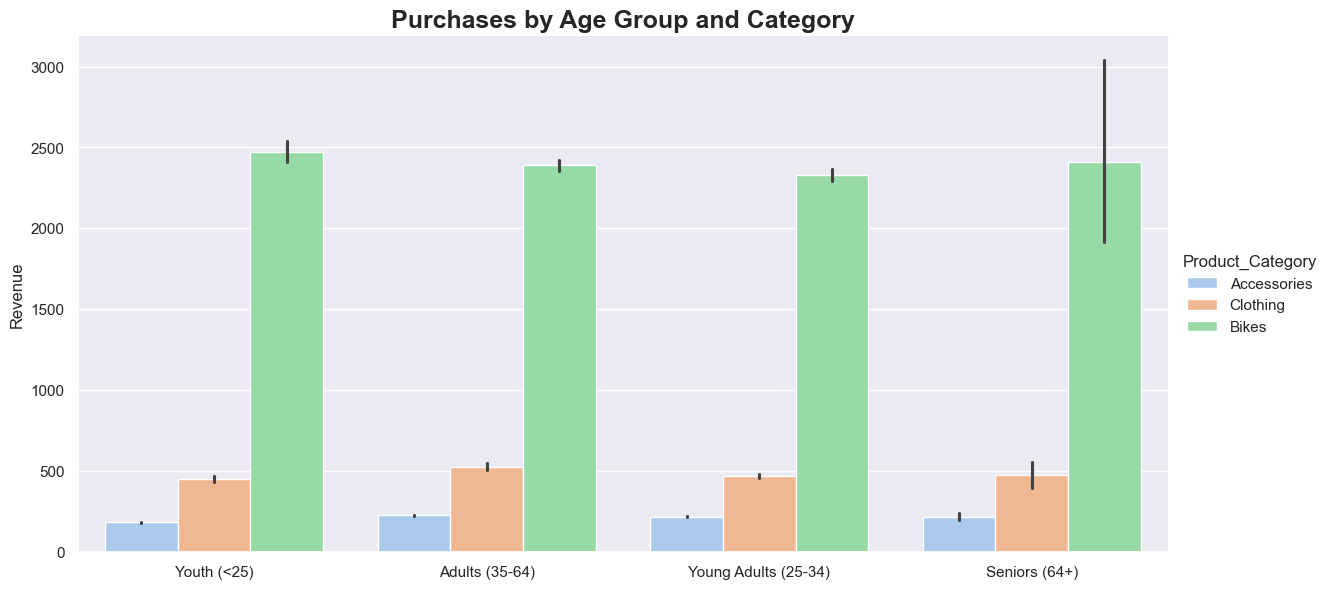

In [98]:
cat_chart = sns.catplot(data=bike_df, x='Age_Group',y='Revenue',hue='Product_Category',kind='bar',aspect=2,height=6,)
cat_chart.set_xlabels('')
plt.title('Purchases by Age Group and Category',fontdict=dict(
    fontsize = 18,
    fontweight = 'bold'
))